In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/decor-rooms/room2.jpg
/kaggle/input/decor-rooms/try.jpg
/kaggle/input/decor-rooms/try2.jpg
/kaggle/input/decor-rooms/room3.jpg
/kaggle/input/decor-rooms/room.jpg


In [2]:
from transformers import SegformerFeatureExtractor, SegformerForSemanticSegmentation
from PIL import Image
import requests

feature_extractor = SegformerFeatureExtractor.from_pretrained("nvidia/segformer-b5-finetuned-ade-512-512")
model = SegformerForSemanticSegmentation.from_pretrained("nvidia/segformer-b5-finetuned-ade-512-512")

url = "/kaggle/input/decor-rooms/room.jpg"
image = Image.open(requests.get(url, stream=True).raw)

inputs = feature_extractor(images=image, return_tensors="pt")
outputs = model(**inputs)
logits = outputs.logits  # shape (batch_size, num_labels, height/4, width/4)


OSError: nvidia/segformer-b5-finetuned-ade-512-512 is not a local folder and is not a valid model identifier listed on 'https://huggingface.co/models'
If this is a private repository, make sure to pass a token having permission to this repo either by logging in with `huggingface-cli login` or by passing `token=<your_token>`

In [7]:
from transformers import SegformerFeatureExtractor, SegformerForSemanticSegmentation

feature_extractor = SegformerFeatureExtractor.from_pretrained("nvidia/segformer-b1-finetuned-ade-512-512")
model = SegformerForSemanticSegmentation.from_pretrained("nvidia/segformer-b1-finetuned-ade-512-512")


preprocessor_config.json:   0%|          | 0.00/271 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/segformer/feature_extraction_segformer.py:28: FutureWarning: The class SegformerFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use SegformerImageProcessor instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/utils/deprecation.py:165: UserWarning: The following named arguments are not valid for `SegformerFeatureExtractor.__init__` and were ignored: 'feature_extractor_type'
  return func(*args, **kwargs)


config.json:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/54.9M [00:00<?, ?B/s]

In [9]:
url = "/kaggle/input/decor-rooms/room.jpg"
image = Image.open(url)

inputs = feature_extractor(images=image, return_tensors="pt")
outputs = model(**inputs)
logits = outputs.logits  # shape (batch_size, num_labels, height/4, width/4)


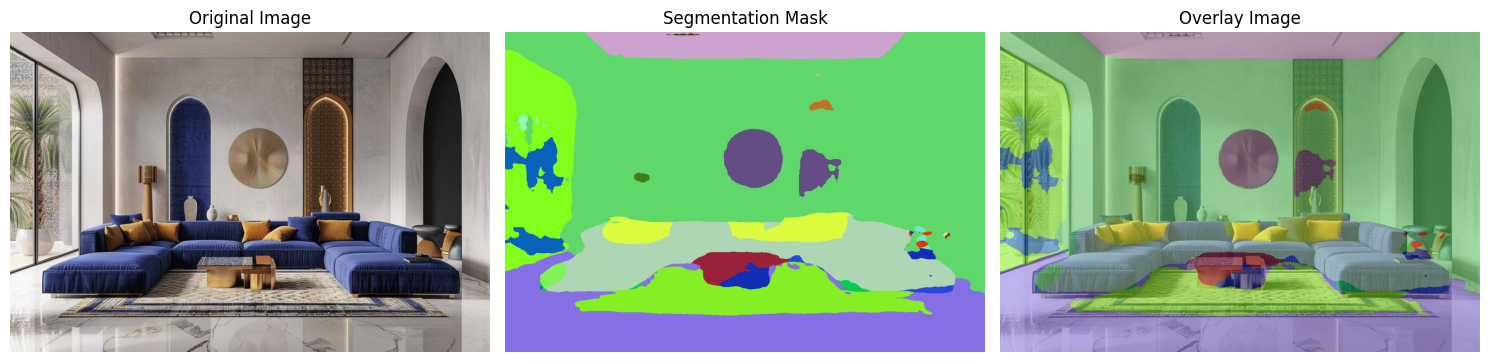

In [17]:
import torch
from transformers import SegformerFeatureExtractor, SegformerForSemanticSegmentation
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load model and feature extractor
model_id = "nvidia/segformer-b1-finetuned-ade-512-512"
feature_extractor = SegformerFeatureExtractor.from_pretrained(model_id)
model = SegformerForSemanticSegmentation.from_pretrained(model_id)

# Load image
url = "/kaggle/input/decor-rooms/room.jpg"
image = Image.open(url)

# Preprocess the image
inputs = feature_extractor(images=image, return_tensors="pt")

# Perform inference
outputs = model(**inputs)
logits = outputs.logits  # shape (batch_size, num_labels, height/4, width/4)

# Get predicted labels per pixel
upsampled_logits = torch.nn.functional.interpolate(
    logits, size=image.size[::-1], mode="bilinear", align_corners=False
)
predicted_labels = torch.argmax(upsampled_logits, dim=1)[0].cpu().numpy()

# Get the label mapping from the model configuration
id2label = model.config.id2label  # This contains the mapping from label IDs to class names.

# Create a color palette
num_classes = len(id2label)
palette = np.random.randint(0, 255, size=(num_classes, 3), dtype=np.uint8)

# Create a segmentation mask
segmentation_mask = palette[predicted_labels]

# Plot results
plt.figure(figsize=(15, 5))

# Original image
plt.subplot(1, 3, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")

# Segmentation mask
plt.subplot(1, 3, 2)
plt.imshow(segmentation_mask)
plt.title("Segmentation Mask")
plt.axis("off")

# Overlay segmentation on original image
overlay = Image.blend(image.convert("RGBA"), Image.fromarray(segmentation_mask).convert("RGBA"), alpha=0.5)
plt.subplot(1, 3, 3)
plt.imshow(overlay)
plt.title("Overlay Image")
plt.axis("off")

plt.tight_layout()
plt.show()


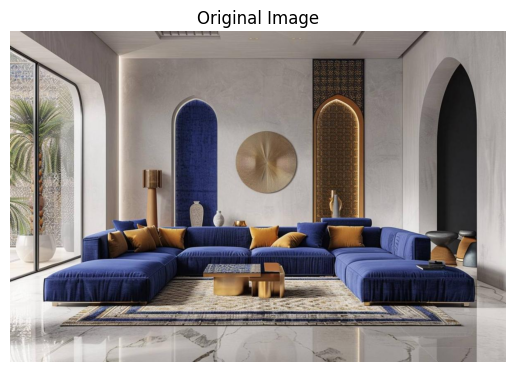

In [14]:
import matplotlib.pyplot as plt

plt.imshow(image)
plt.axis("off")
plt.title("Original Image")
plt.show()


# This One

## segformer: segmentation and detection

In [2]:
from transformers import pipeline
from PIL import Image
import torch
from transformers import SegformerFeatureExtractor, SegformerForSemanticSegmentation
import numpy as np
import matplotlib.pyplot as plt

device = 0 if torch.cuda.is_available() else -1  # 0 for GPU, -1 for CPU

# Create an image segmentation pipeline with a pre-trained model
segmentation_pipeline = pipeline("image-segmentation", model="nvidia/segformer-b1-finetuned-ade-512-512",device=device)

# Load an example image (you can also upload your own image later)
image_path = "/kaggle/input/decor-rooms/room5.jpg"
orig_image = Image.open(image_path)


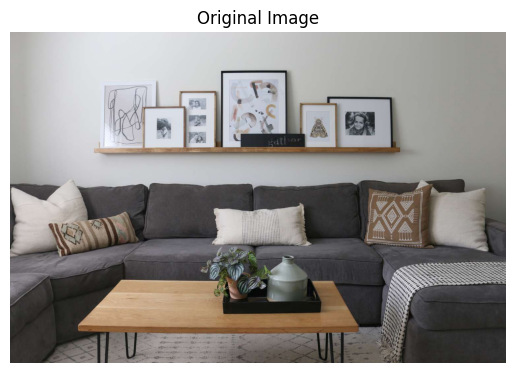

In [3]:
import matplotlib.pyplot as plt

plt.imshow(orig_image)
plt.axis("off")
plt.title("Original Image")
plt.show()


In [4]:

# Perform segmentation
result = segmentation_pipeline(orig_image)



In [5]:
# Print the detected objects
for obj in result:
    print(f"Label: {obj['label']}, Mask Size: {obj['mask'].size}")


Label: wall, Mask Size: (1500, 1001)
Label: floor, Mask Size: (1500, 1001)
Label: plant, Mask Size: (1500, 1001)
Label: painting, Mask Size: (1500, 1001)
Label: sofa, Mask Size: (1500, 1001)
Label: shelf, Mask Size: (1500, 1001)
Label: rug, Mask Size: (1500, 1001)
Label: cushion, Mask Size: (1500, 1001)
Label: coffee table, Mask Size: (1500, 1001)
Label: flower, Mask Size: (1500, 1001)
Label: pot, Mask Size: (1500, 1001)
Label: vase, Mask Size: (1500, 1001)


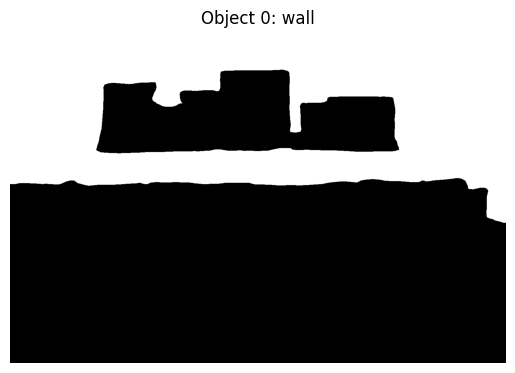

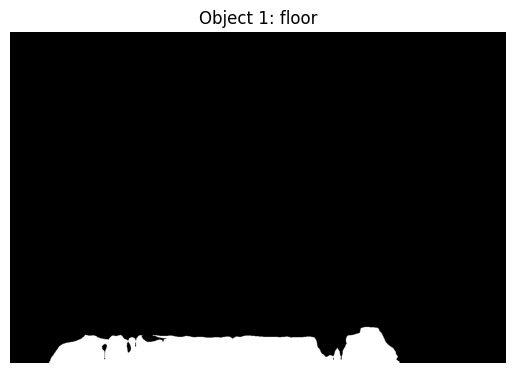

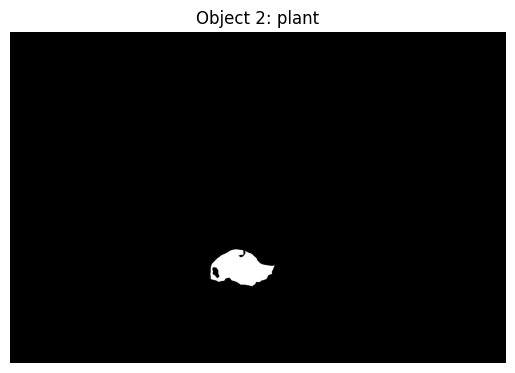

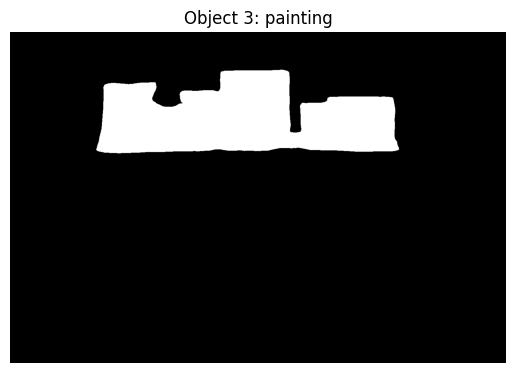

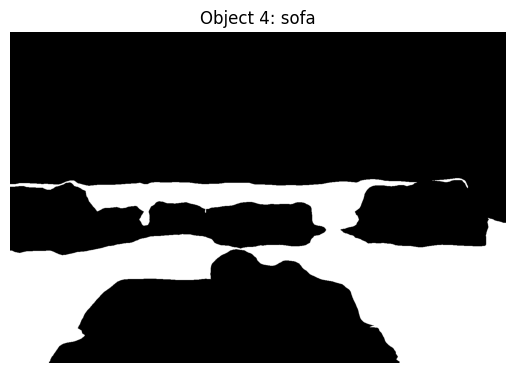

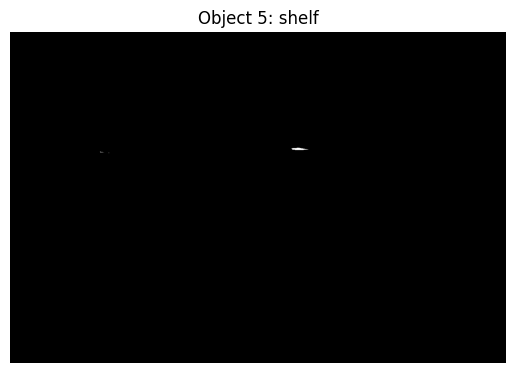

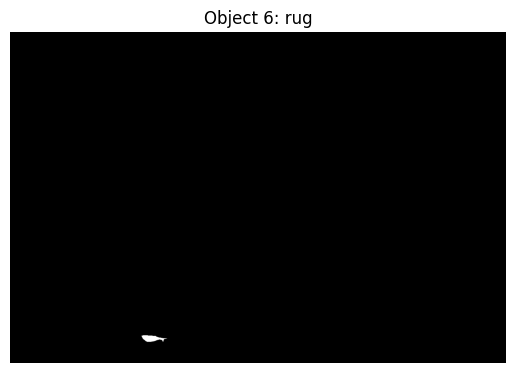

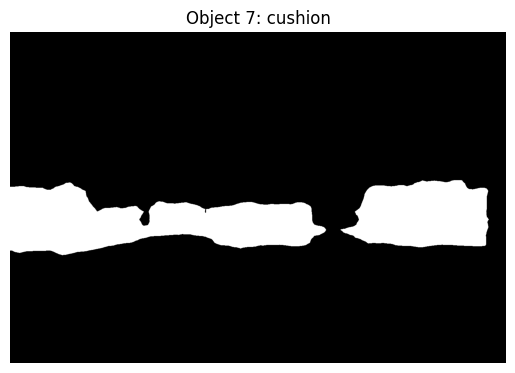

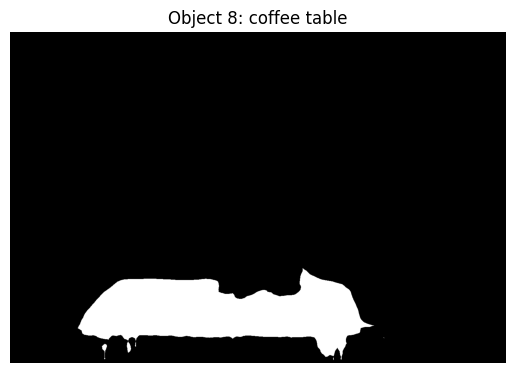

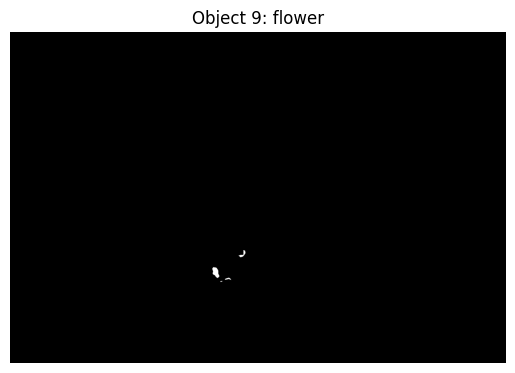

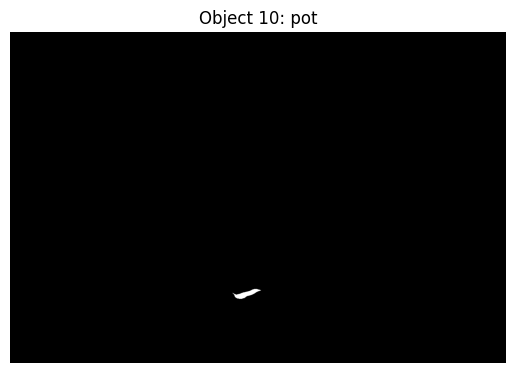

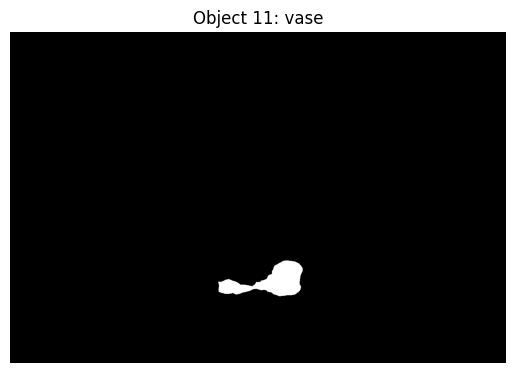

In [6]:
# Visualize all detected masks
for i, obj in enumerate(result):
    plt.imshow(obj['mask'], cmap="gray")
    plt.axis("off")
    plt.title(f"Object {i}: {obj['label']}")
    plt.show()


preprocessor_config.json:   0%|          | 0.00/271 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/segformer/feature_extraction_segformer.py:28: FutureWarning: The class SegformerFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use SegformerImageProcessor instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/utils/deprecation.py:165: UserWarning: The following named arguments are not valid for `SegformerFeatureExtractor.__init__` and were ignored: 'feature_extractor_type'
  return func(*args, **kwargs)


config.json:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/54.9M [00:00<?, ?B/s]

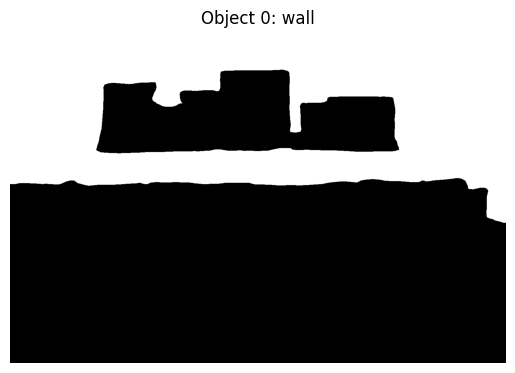

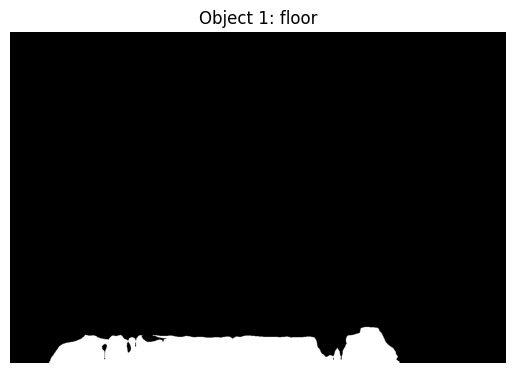

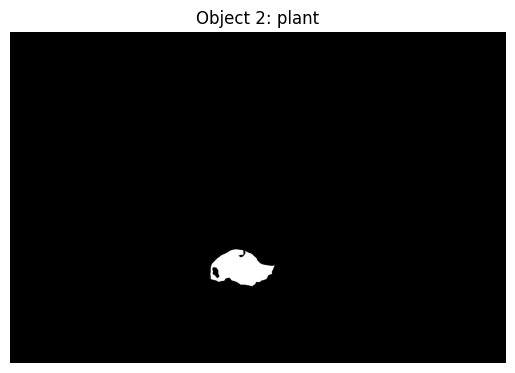

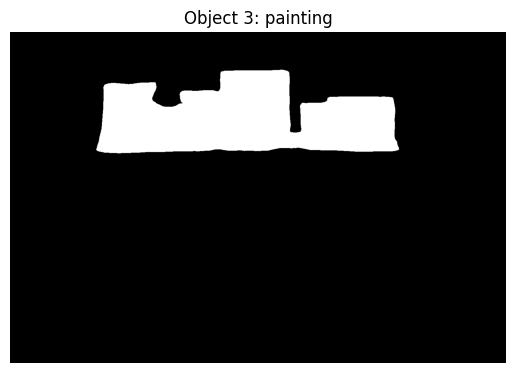

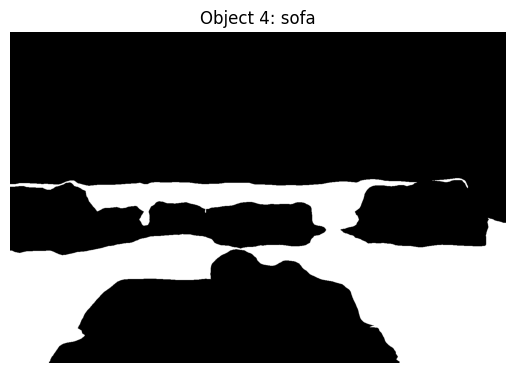

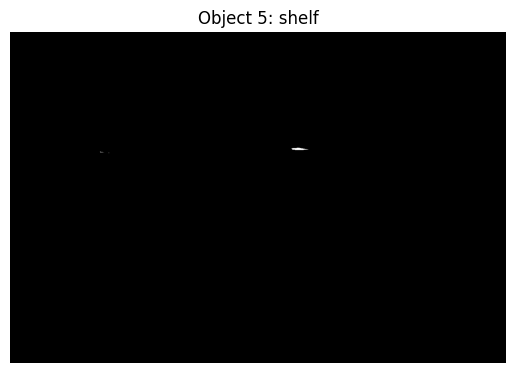

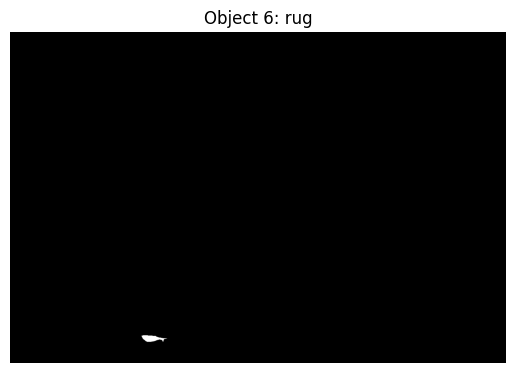

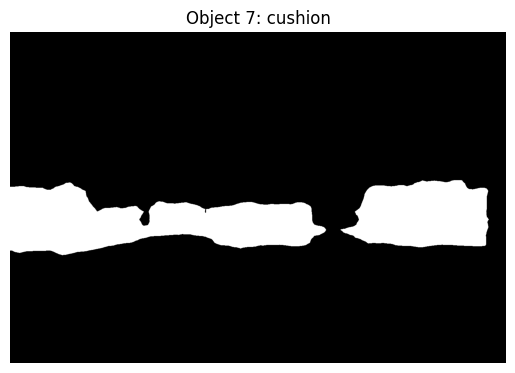

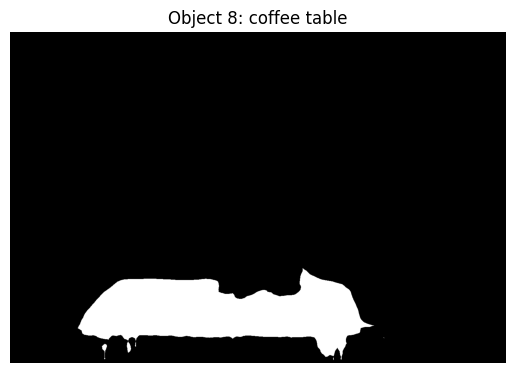

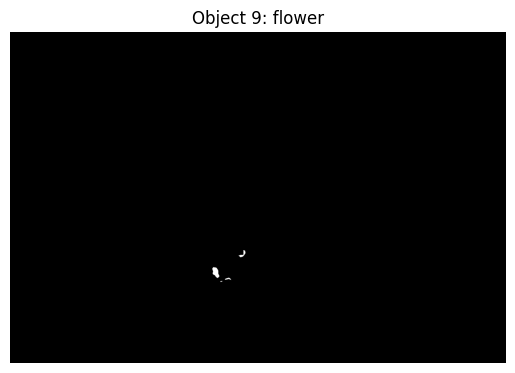

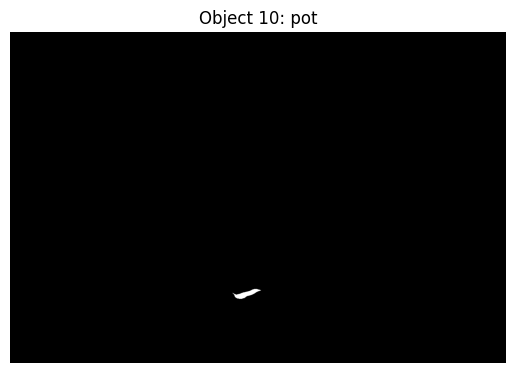

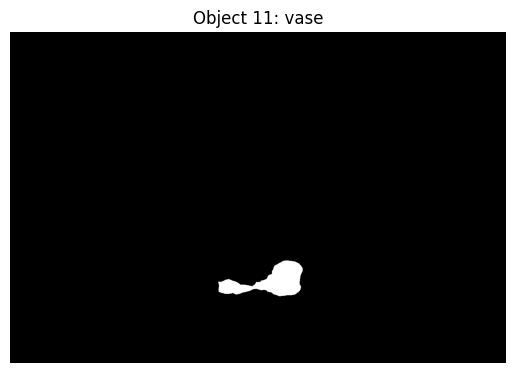

In [3]:
import torch
from transformers import SegformerFeatureExtractor, SegformerForSemanticSegmentation
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load model and feature extractor
model_id = "nvidia/segformer-b1-finetuned-ade-512-512"
feature_extractor = SegformerFeatureExtractor.from_pretrained(model_id)
model = SegformerForSemanticSegmentation.from_pretrained(model_id)

# Load image
url = "/kaggle/input/decor-rooms/room5.jpg"
image = Image.open(url)

# Preprocess the image
inputs = feature_extractor(images=image, return_tensors="pt")

# Perform inference
outputs = model(**inputs)
logits = outputs.logits  # shape (batch_size, num_labels, height/4, width/4)

# Get predicted labels per pixel
upsampled_logits = torch.nn.functional.interpolate(
    logits, size=image.size[::-1], mode="bilinear", align_corners=False
)
predicted_labels = torch.argmax(upsampled_logits, dim=1)[0].cpu().numpy()

# Get the label mapping from the model configuration
id2label = model.config.id2label  # This contains the mapping from label IDs to class names.

# Create individual masks for each object
unique_labels = np.unique(predicted_labels)  # Get unique label IDs in the segmentation
masks = []
for label in unique_labels:
    mask = (predicted_labels == label).astype(np.uint8)  # Binary mask for the object
    masks.append({'label': id2label[label], 'mask': mask})

# Visualize each mask
for i, obj in enumerate(masks):
    plt.imshow(obj['mask'], cmap="gray")
    plt.axis("off")
    plt.title(f"Object {i}: {obj['label']}")
    plt.show()


Enter the label of the object to modify:  wall


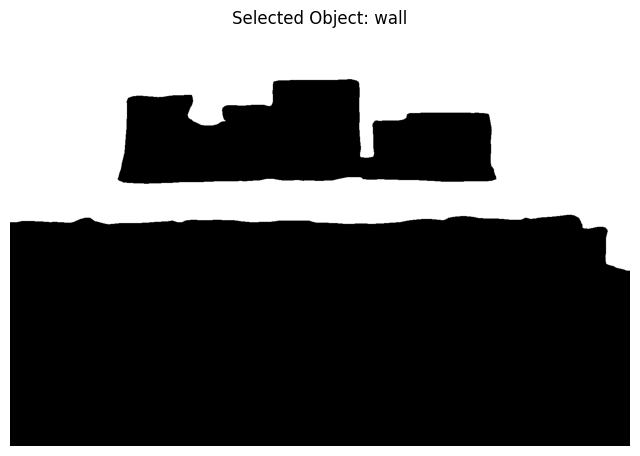

In [4]:
# Simulate user selection (e.g., "sofa" or specific object index)
try:
    selected_label = input("Enter the label of the object to modify: ")

    # Search for the object with the entered label
    selected_object = next(
        obj for obj in masks if obj["label"].lower() == selected_label.lower()
    )

    # Get the selected mask
    selected_mask = selected_object["mask"]

    # Visualize the selected mask
    plt.figure(figsize=(8, 8))
    plt.imshow(selected_mask, cmap="gray")
    plt.axis("off")
    plt.title(f"Selected Object: {selected_label}")
    plt.show()

except StopIteration:
    print(f"Error: No object found with the label '{selected_label}'. Please try again.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


In [2]:
! pip install diffusers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 33.8 MB/s eta 0:00:00a 0:00:01


In [5]:
from diffusers import StableDiffusionInpaintPipeline
import torch
from PIL import Image
import numpy as np

# Load Stable Diffusion Inpainting model
pipe = StableDiffusionInpaintPipeline.from_pretrained(
    "runwayml/stable-diffusion-inpainting", 
    torch_dtype=torch.float16
).to("cuda")





model_index.json:   0%|          | 0.00/548 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/748 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/492M [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.78k [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/552 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/335M [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280ae

In [6]:
# Load the original image
original_image = image.convert("RGB")  # Ensure RGB format

# Convert the binary mask (selected_mask) to a PIL image
selected_mask = Image.fromarray((selected_mask * 255).astype(np.uint8)).convert("L")

# Define the prompt for the desired change
prompt = "Change the wall to have a red velvet texture."

# Perform inpainting with the diffusion model
result = pipe(
    prompt=prompt,
    image=original_image,
    mask_image=selected_mask,
    guidance_scale=7.5
).images[0]



  0%|          | 0/50 [00:00<?, ?it/s]

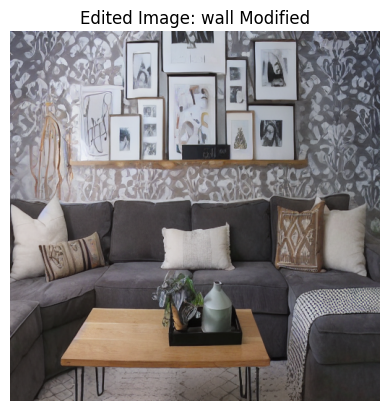

In [7]:
# Display the result
plt.imshow(result)
plt.axis("off")
plt.title(f"Edited Image: {selected_label} Modified")
plt.show()


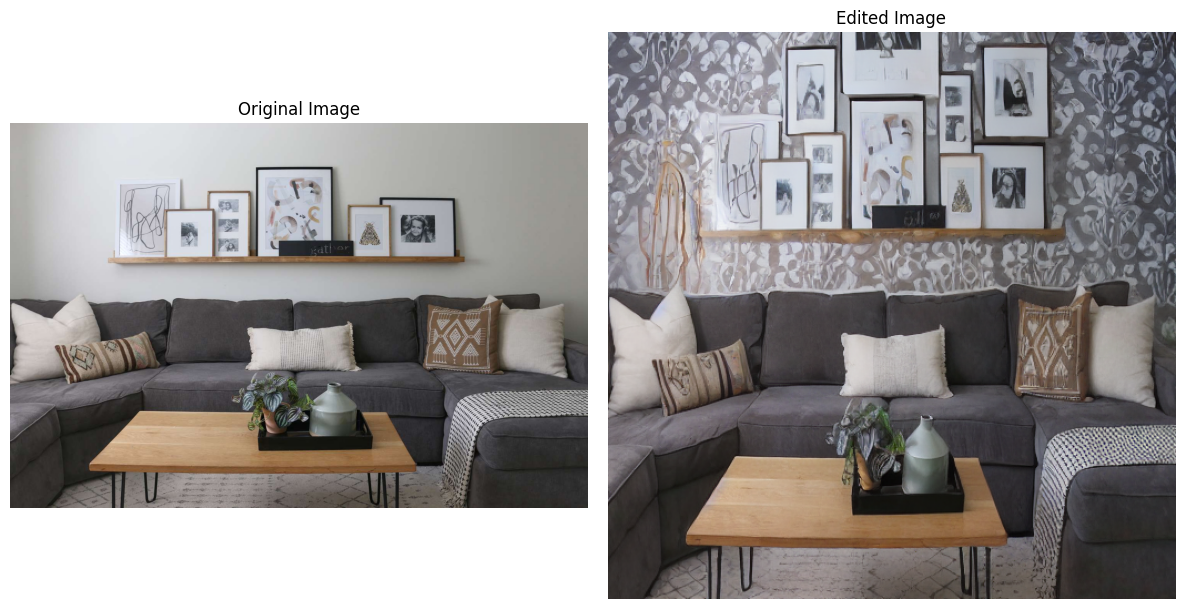

In [8]:
import matplotlib.pyplot as plt

# Display the original and edited images side-by-side
plt.figure(figsize=(12, 6))  # Adjust the figure size

# Display the original image
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.imshow(original_image)
plt.title("Original Image")
plt.axis("off")

# Display the edited image
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.imshow(result)
plt.title("Edited Image")
plt.axis("off")

# Show the combined plot
plt.tight_layout()
plt.show()


## ControlNet

Enter the label of the object to modify:  sofa


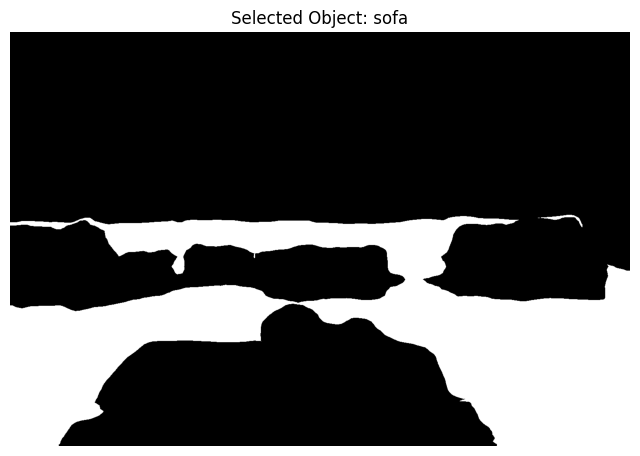

In [9]:
# Simulate user selection (e.g., "sofa" or specific object index)
try:
    selected_label = input("Enter the label of the object to modify: ")

    # Search for the object with the entered label
    selected_object = next(
        obj for obj in masks if obj["label"].lower() == selected_label.lower()
    )

    # Get the selected mask
    selected_mask_sofa = selected_object["mask"]

    # Visualize the selected mask
    plt.figure(figsize=(8, 8))
    plt.imshow(selected_mask_sofa, cmap="gray")
    plt.axis("off")
    plt.title(f"Selected Object: {selected_label}")
    plt.show()

except StopIteration:
    print(f"Error: No object found with the label '{selected_label}'. Please try again.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


###  Text-to-Image Using a Segmentation Mask

In [10]:
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel, UniPCMultistepScheduler
import torch
from PIL import Image
import numpy as np

# Load the ControlNet model for segmentation
controlnet = ControlNetModel.from_pretrained("lllyasviel/control_v11p_sd15_seg", torch_dtype=torch.float16)

# Load the Stable Diffusion pipeline with ControlNet
pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5", controlnet=controlnet, torch_dtype=torch.float16
).to("cuda")

pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)

# Convert selected_mask to PIL Image
selected_mask_sofa = Image.fromarray((selected_mask_sofa * 255).astype(np.uint8)).convert("L")

# Define a text prompt and run the pipeline
prompt = "Change the sofa to have a red velvet texture."
result = pipe(prompt=prompt, image=original_image, control_image=selected_mask_sofa).images[0]




config.json:   0%|          | 0.00/994 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.45G [00:00<?, ?B/s]

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


  0%|          | 0/50 [00:00<?, ?it/s]

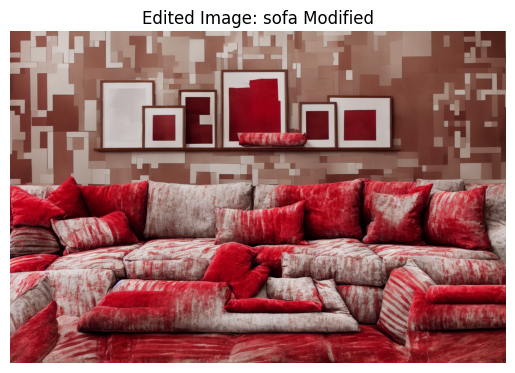

In [11]:
# Display the result
plt.imshow(result)
plt.axis("off")
plt.title(f"Edited Image: {selected_label} Modified")
plt.show()


### Image-to-Image with Depth Map

In [20]:
from transformers import pipeline
from diffusers import StableDiffusionControlNetImg2ImgPipeline, ControlNetModel
import torch
import numpy as np

# Generate the depth map
depth_estimator = pipeline("depth-estimation")
depth_map = depth_estimator(original_image)["depth"]
depth_map = np.array(depth_map)
depth_map = depth_map[:, :, None]
depth_map = np.concatenate([depth_map, depth_map, depth_map], axis=2)
depth_map = torch.tensor(depth_map).permute(2, 0, 1).unsqueeze(0).half().to("cuda")

# Load ControlNet for depth conditioning
controlnet = ControlNetModel.from_pretrained("lllyasviel/control_v11f1p_sd15_depth", torch_dtype=torch.float16)

# Load the pipeline
pipe = StableDiffusionControlNetImg2ImgPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5", controlnet=controlnet, torch_dtype=torch.float16
).to("cuda")

# Define a prompt and perform image-to-image transformation
prompt = "Change the wall to have a soft texture."
output = pipe(prompt=prompt, image=original_image, control_image=depth_map).images[0]




No model was supplied, defaulted to Intel/dpt-large and revision e93beec (https://huggingface.co/Intel/dpt-large).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of DPTForDepthEstimation were not initialized from the model checkpoint at Intel/dpt-large and are newly initialized: ['neck.fusion_stage.layers.0.residual_layer1.convolution1.bias', 'neck.fusion_stage.layers.0.residual_layer1.convolution1.weight', 'neck.fusion_stage.layers.0.residual_layer1.convolution2.bias', 'neck.fusion_stage.layers.0.residual_layer1.convolution2.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

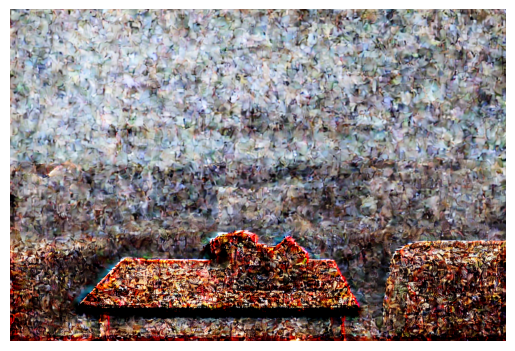

In [21]:
# Display the result
plt.imshow(output)
plt.axis("off")
plt.show()


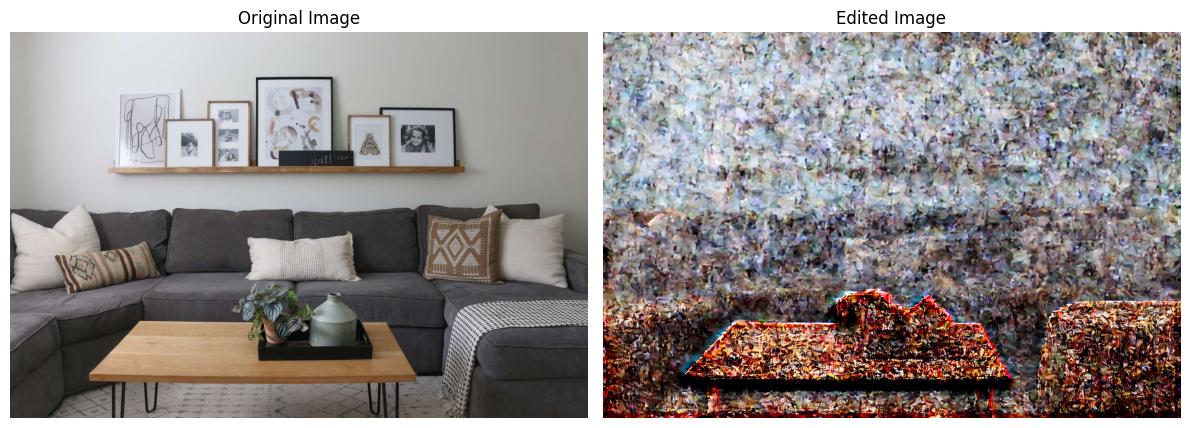

In [22]:
import matplotlib.pyplot as plt

# Display the original and edited images side-by-side
plt.figure(figsize=(12, 6))  # Adjust the figure size

# Display the original image
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.imshow(original_image)
plt.title("Original Image")
plt.axis("off")

# Display the edited image
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.imshow(output)
plt.title("Edited Image")
plt.axis("off")

# Show the combined plot
plt.tight_layout()
plt.show()


 ### Inpainting with ControlNet

Enter the label of the object to modify:  wall


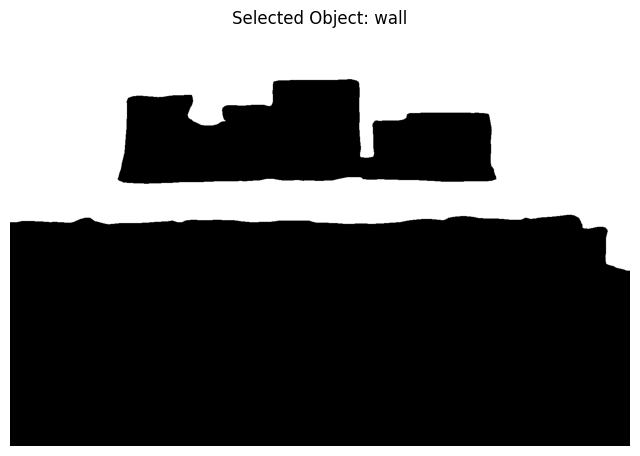

In [16]:
try:
    selected_label_wall = input("Enter the label of the object to modify: ")

    # Search for the object with the entered label
    selected_object = next(
        obj for obj in masks if obj["label"].lower() == selected_label_wall.lower()
    )

    # Get the selected mask
    selected_mask_wall = selected_object["mask"]

    # Visualize the selected mask
    plt.figure(figsize=(8, 8))
    plt.imshow(selected_mask_wall, cmap="gray")
    plt.axis("off")
    plt.title(f"Selected Object: {selected_label_wall}")
    plt.show()

except StopIteration:
    print(f"Error: No object found with the label '{selected_label_wall}'. Please try again.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


In [18]:
from diffusers import StableDiffusionControlNetInpaintPipeline, ControlNetModel
import numpy as np
import torch
from PIL import Image

# Prepare the inpainting mask
mask_image = Image.fromarray((selected_mask_wall * 255).astype(np.uint8)).convert("L")

# Create the control image (optional conditioning)
control_image = np.array(original_image.convert("RGB")).astype(np.float32) / 255.0

# Convert mask_image to a NumPy array for comparison
mask_array = np.array(mask_image).astype(np.float32) / 255.0  # Normalize to [0, 1]

# Apply the mask condition to control_image
control_image[mask_array > 0.5] = -1.0  # Set masked pixels to -1.0

# Convert control_image back to a tensor
control_image = torch.tensor(control_image).permute(2, 0, 1).unsqueeze(0).float()

# Load ControlNet for inpainting
controlnet = ControlNetModel.from_pretrained("lllyasviel/control_v11p_sd15_inpaint", torch_dtype=torch.float16)
pipe = StableDiffusionControlNetInpaintPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5", controlnet=controlnet, torch_dtype=torch.float16
).to("cuda")

# Define a detailed prompt for the wall
prompt = "Replace the wall with a royal blue velvet texture, soft and luxurious, with elegant light reflections."

# Run the inpainting pipeline
result = pipe(prompt=prompt, image=original_image, mask_image=mask_image, control_image=control_image).images[0]



config.json:   0%|          | 0.00/998 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.45G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

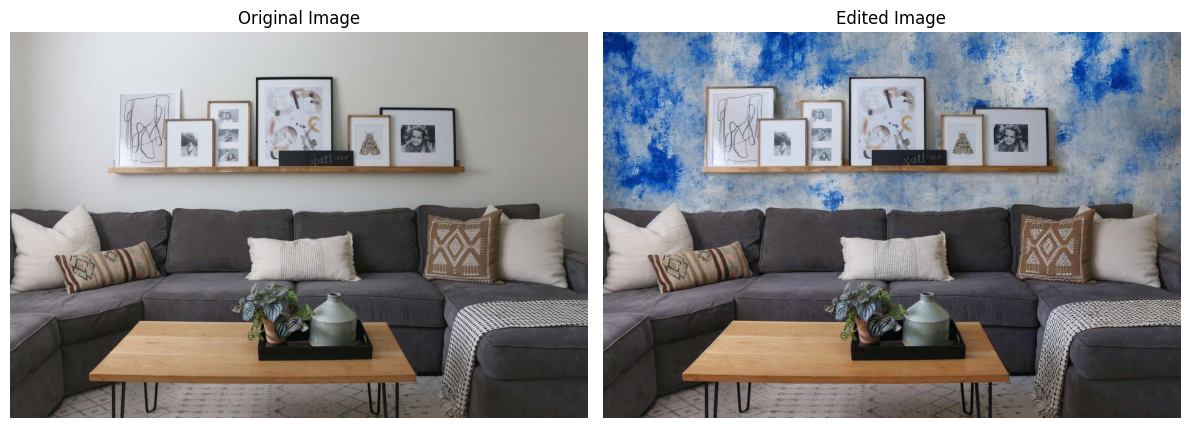

In [19]:
import matplotlib.pyplot as plt

# Display the original and edited images side-by-side
plt.figure(figsize=(12, 6))  # Adjust the figure size

# Display the original image
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.imshow(original_image)
plt.title("Original Image")
plt.axis("off")

# Display the edited image
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.imshow(result)
plt.title("Edited Image")
plt.axis("off")

# Show the combined plot
plt.tight_layout()
plt.show()
